In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.datasets import load_digits
from sklearn import preprocessing,linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn

## 1. Using Logistic Regression to predict one digit:

In [290]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

Text(0.5, 1.05, '8')

<Figure size 432x288 with 0 Axes>

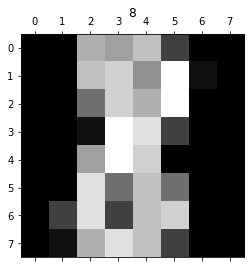

In [291]:
plt.gray();
i = 40
plt.matshow(digits.images[i]);
plt.title(digits.target[i])

In [292]:
x_train, x_test, y_train,y_test = train_test_split(digits.data,digits.target,test_size = 0.2)

## Training for one particular digit:

In [305]:
ytrain5 = (y_train == 5)
ytest5 = (y_test == 5)

In [306]:
model = LogisticRegression(max_iter=10000)

## Model Training

In [307]:
model.fit(x_train,ytrain5)

LogisticRegression(max_iter=10000)

## Model Accuracy

In [313]:
model.score(x_test,ytest5)

0.9916666666666667

## 2.Confusion Matrix

In [310]:
predicted =cross_val_predict(model, x_train,ytrain5,cv=3)
cm = confusion_matrix(ytrain5, predicted)
cm

array([[1284,    7],
       [   8,  138]], dtype=int64)

Text(24.0, 0.5, 'truth')

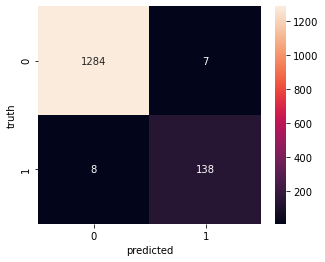

In [309]:
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot= True,fmt="d")
plt.xlabel('predicted')
plt.ylabel('truth')

## 2. Confusion Matrix

In [ ]:
x_test

In [ ]:

cm = confusion_matrix(y_test,y_predicted)
cm



In [ ]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot= True)
plt.xlabel('predicted')
plt.ylabel('truth')

## 3. Logistic regrission to classify the 10 digits (Multiclassification):
    

### Loading DataSet

In [318]:
training = pd.read_csv("train.csv")


### exploring data:
data from Kaggel:
    [data](https://www.kaggle.com/c/digit-recognizer/data)

In [321]:
training.shape


(42000, 785)

In [322]:
images = training.iloc[0:5000 , 1:]
labels = training.iloc[0:5000 , 0]


In [195]:
images_train, images_test, labels_train,labels_test = train_test_split(
    images,labels,test_size = 0.2)


In [323]:
images_train.head(11)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [324]:
labels_train

2553    7
470     3
1722    0
3202    7
2963    7
       ..
2747    5
12      1
2587    2
1757    7
2402    5
Name: label, Length: 4000, dtype: int64

Text(0.5, 1.0, '6')

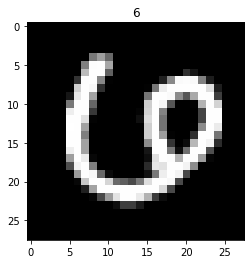

In [325]:
i=5
img=images_train.iloc[i].to_numpy()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(labels_train.iloc[i])


In [326]:
lr = LogisticRegression(max_iter=10000)


In [327]:
lr.fit(images_train, labels_train)

LogisticRegression(max_iter=10000)

In [328]:
lr.score(images_test, labels_test)

0.871

In [329]:
results = lr.predict(images_test)

In [330]:
labels_test

4485    1
2       1
4498    2
410     2
2549    1
       ..
981     2
2360    3
455     9
3242    3
1782    6
Name: label, Length: 1000, dtype: int64

In [331]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(labels_test, results)
cm2

array([[ 93,   0,   0,   0,   0,   1,   3,   0,   0,   1],
       [  0, 103,   0,   0,   0,   1,   0,   1,   2,   0],
       [  3,   3, 103,   2,   1,   1,   1,   2,   4,   0],
       [  3,   0,   5,  77,   0,   9,   0,   0,   2,   1],
       [  0,   1,   1,   0,  88,   1,   4,   1,   2,   8],
       [  3,   0,   2,   3,   1,  84,   1,   0,   6,   0],
       [  2,   0,   0,   0,   0,   2,  93,   0,   0,   1],
       [  0,   0,   5,   1,   0,   0,   0,  81,   0,   5],
       [  0,   1,   5,   3,   0,   6,   2,   0,  69,   3],
       [  0,   0,   2,   2,   1,   2,   0,   3,   3,  80]], dtype=int64)

Text(69.0, 0.5, 'truth')

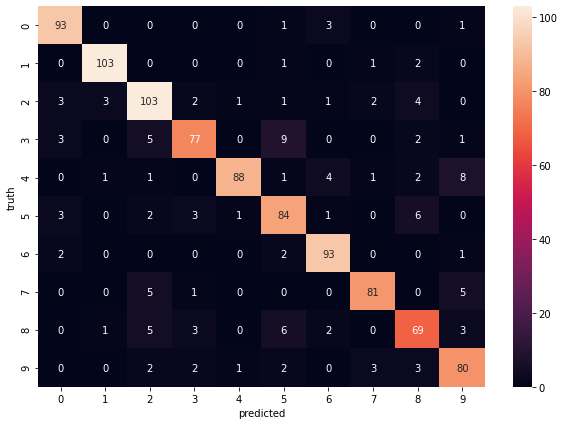

In [333]:
plt.figure(figsize=(10,7))
sn.heatmap(cm2,annot= True,fmt="d")
plt.xlabel('predicted')
plt.ylabel('truth')